In [2]:
import pandas as pd

def create_merged_dataset():
    # 1. Load the datasets
    # Make sure these CSV files are in the same directory as your script
    orders_df = pd.read_csv('olist_orders_dataset.csv')
    reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
    customers_df = pd.read_csv('olist_customers_dataset.csv')
    products_df = pd.read_csv('olist_products_dataset.csv')

    print(f"Initial Orders: {len(orders_df)}")
    print(f"Initial Reviews: {len(reviews_df)}")
    print(f"Initial Customers: {len(customers_df)}")


    
    # sorting by 'review_answer_timestamp' to keep the most recent one.
    
    # Convert timestamps to datetime objects
    reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'])
    
    # Sort descending (latest first) and drop duplicates on 'order_id'
    reviews_pp = reviews_df.sort_values(by='review_answer_timestamp', ascending=False ).drop_duplicates(subset=['order_id'], keep='first')

    print(f"Reviews after unduplication: {len(reviews_pp)}")

    # Perform the Joins and merging the datasets into one 
    orders_rev = orders_df.merge(
        reviews_pp, how='left',on='order_id'
    )

    # Step B: Join with Customers (Left Join)
    # This adds location data (city, state) to the orders.
    master_df = pd.merge(
        orders_rev, 
        customers_df, 
        on='customer_id', 
        how='left'
    )

    # 4. Final Verification
    print("-" * 30)
    print(f"Final Dataset Rows: {len(master_df)}")
    
    if len(master_df) == len(orders_df):
        print("SUCCESS: Row count matches original orders table.")
    else:
        print(f"WARNING: Row count mismatch! (Diff: {len(master_df) - len(orders_df)})")

    # 5. Save to CSV
    master_df.to_csv('master_dataset.csv', index=False)
    print("File saved as 'master_dataset.csv'")

if __name__ == "__main__":
    create_merged_dataset()

Initial Orders: 99441
Initial Reviews: 99224
Initial Customers: 99441
Reviews after unduplication: 98673
------------------------------
Final Dataset Rows: 99441
SUCCESS: Row count matches original orders table.
File saved as 'master_dataset.csv'


In [3]:
# reading the new merged dataset
merged = pd.read_csv('master_dataset.csv')
# overview of merged dataset
merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [4]:
# number of new columns
len(merged.columns)

18

In [5]:
# Checking for missing values
merged.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  160
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
order_estimated_delivery_date        0
review_id                          768
review_score                       768
review_comment_title             87891
review_comment_message           58666
review_creation_date               768
review_answer_timestamp            768
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
dtype: int64

In [6]:
# Handle missing values and Incomplete orders
# created an identical dataset to the merged data and dropped empty data based on the actual delivered datw
delivered_orders = merged.dropna(subset=['order_delivered_customer_date']).copy()

In [7]:
delivered_orders.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date         1
order_delivered_customer_date        0
order_estimated_delivery_date        0
review_id                          646
review_score                       646
review_comment_title             85290
review_comment_message           57572
review_creation_date               646
review_answer_timestamp            646
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
dtype: int64

In [8]:
# Convert date strings to datetime objects
date_cols = ['order_estimated_delivery_date', 'order_delivered_customer_date']
for col in date_cols:
    delivered_orders[col] = pd.to_datetime(delivered_orders[col])

In [9]:
#Calculate Days_Difference (Estimated - Actual)
# A positive number means early/on-time; a negative number means late.
diff = delivered_orders['order_estimated_delivery_date'] - delivered_orders['order_delivered_customer_date']

In [10]:
# Convertingg the days difference to a number
delivered_orders['Days_Difference'] = diff.dt.total_seconds() / (24*60*60)

In [11]:
# Classify Delivery Status
def classify_status(days):
    if days >= 0:
        return "On Time"
    elif days >= -5:
        return "Late"
    else:
        return "Super Late"

# creating a new column in the delivered_orders dataset named 'Delivery_Status'   
delivered_orders['Delivery_Status'] = delivered_orders['Days_Difference'].apply(classify_status)

In [12]:
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Days_Difference,Delivery_Status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,7.107488,On Time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,5.355729,On Time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,17.245498,On Time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,12.980069,On Time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,9.238171,On Time


In [13]:
print(delivered_orders['Delivery_Status'].value_counts())
print("\nPercentage Distribution:")
print(delivered_orders['Delivery_Status'].value_counts(normalize=True) * 100)


Delivery_Status
On Time       88649
Super Late     4212
Late           3615
Name: count, dtype: int64

Percentage Distribution:
Delivery_Status
On Time       91.887101
Super Late     4.365853
Late           3.747046
Name: proportion, dtype: float64


<Axes: xlabel='Delivery_Status', ylabel='count'>

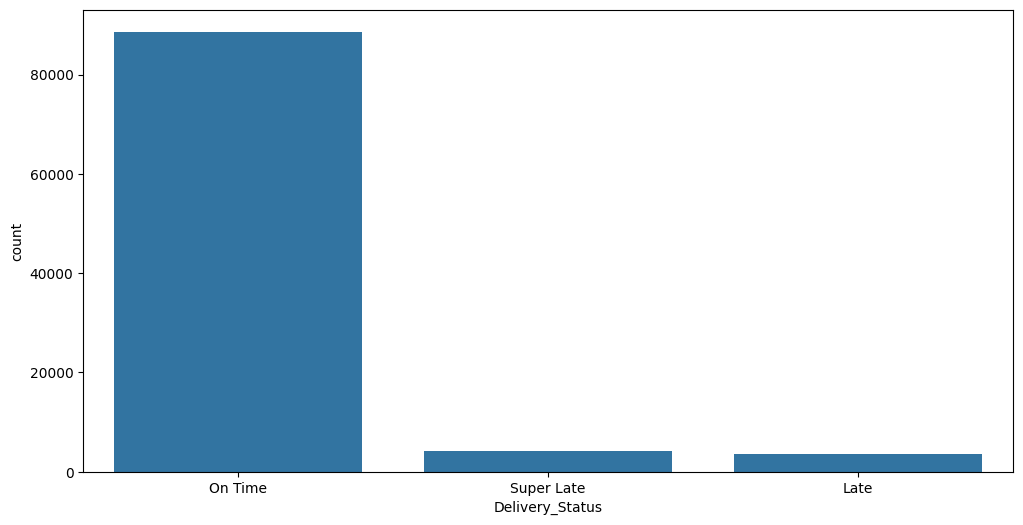

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(x=delivered_orders['Delivery_Status'])

In [15]:
delivered_orders['customer_state'].unique()

array(['SP', 'BA', 'GO', 'RN', 'PR', 'RJ', 'RS', 'MG', 'SC', 'RR', 'PE',
       'TO', 'CE', 'DF', 'SE', 'MT', 'PB', 'PA', 'RO', 'ES', 'AP', 'MS',
       'MA', 'PI', 'AL', 'AC', 'AM'], dtype=object)

In [16]:
delivered_orders['late'] = delivered_orders['order_delivered_customer_date'] > delivered_orders['order_estimated_delivery_date']

In [18]:
# 5. Aggregate by State
state_group = delivered_orders.groupby('customer_state').agg(
    total_orders=('order_id', 'count'),
    late_orders=('late', 'sum')
).reset_index()

state_group['late_percentage'] = (state_group['late_orders'] / state_group['total_orders']) * 100


In [20]:
state_performance = state_group.sort_values(by='late_percentage', ascending=False)

<BarContainer object of 27 artists>

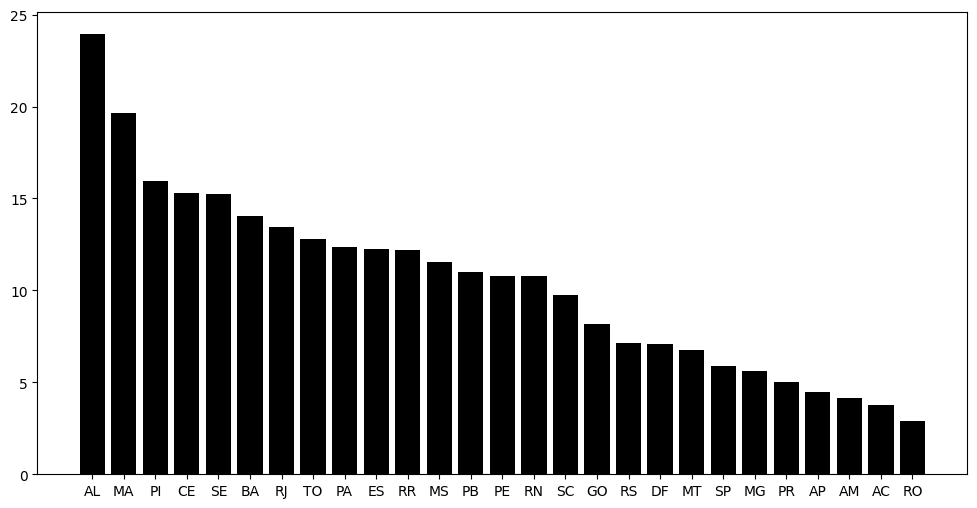

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(state_performance['customer_state'], state_performance['late_percentage'], color='black')

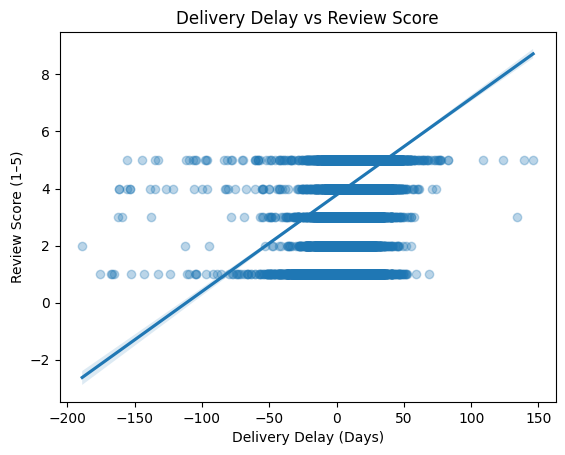

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    x="Days_Difference",
    y="review_score",
    data=delivered_orders,
    scatter_kws={"alpha":0.3}
)

plt.title("Delivery Delay vs Review Score")
plt.xlabel("Delivery Delay (Days)")
plt.ylabel("Review Score")
plt.show()


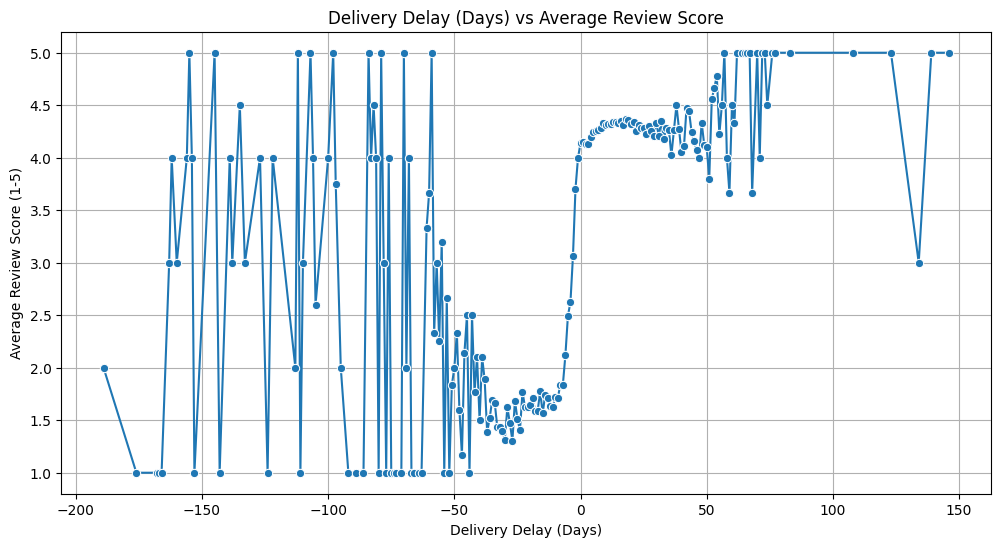

In [30]:
# Group by delivery delay (rounded to nearest day) and calculate average review score
delivered_orders['Delivery Delay Days'] = delivered_orders['Days_Difference'].round() #positive means on time
avg_review_score = delivered_orders.groupby('Delivery Delay Days')['review_score'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_review_score, x='Delivery Delay Days', y='review_score', marker='o')
plt.title("Delivery Delay (Days) vs Average Review Score")
plt.xlabel("Delivery Delay (Days)")
plt.ylabel("Average Review Score (1-5)")
plt.grid(True)
plt.show()

In [ ]:
# Grouping by Delivery Status and calculating the average review score
average_review_scores = delivered_orders.groupby('Delivery_Status')['review_score'].mean()

print(average_review_scores.round(2))

Delivery_Status
Late          3.46
On Time       4.29
Super Late    1.78
Name: review_score, dtype: float64


In [34]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
order_product = order_items.merge(products,how='left',on='product_id')

In [40]:
delivered_orders = delivered_orders.merge(order_product, how='left', on='order_id')

In [41]:
# Load the product category translation file
category_translation = pd.read_csv('product_category_name_translation.csv')

# Merge the translation with the delivered_orders dataset
delivered_orders = delivered_orders.merge(category_translation,how='left',on='product_category_name')

# Verify the merged dataset
delivered_orders[['product_category_name', 'product_category_name_english']].head()

,product_category_name,product_category_name_english
0,utilidades_domesticas,housewares
1,perfumaria,perfumery
2,automotivo,auto
3,pet_shop,pet_shop
4,papelaria,stationery


C:\Users\Zaydan\AppData\Local\Temp\ipykernel_20260\1756104149.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_analysis, x='customer_state', y='avg_review_score', palette='viridis')


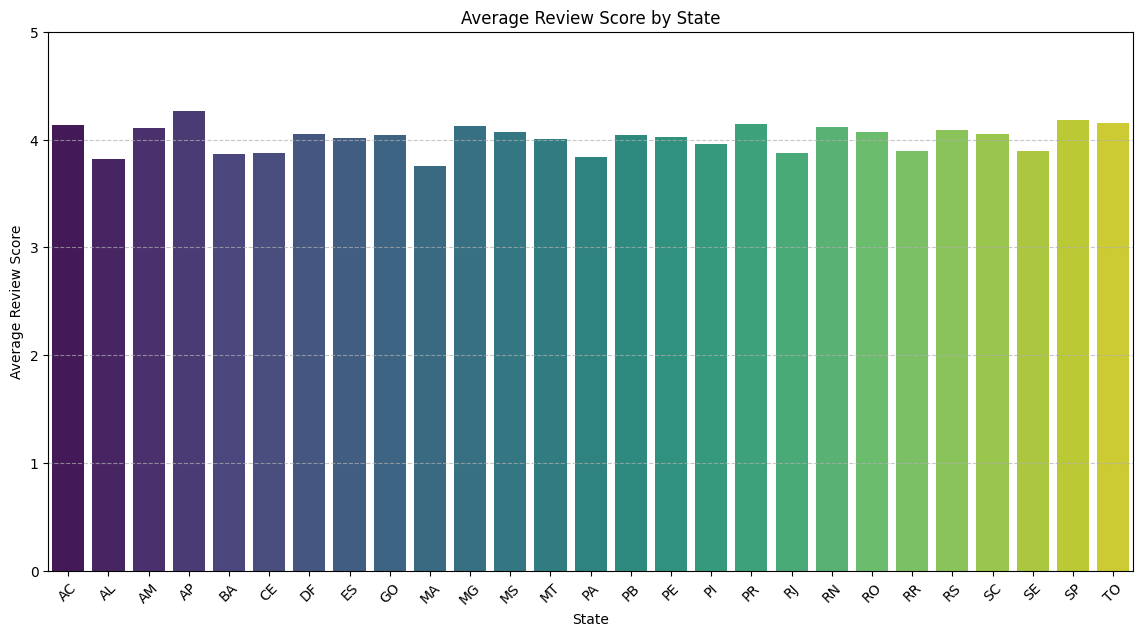

In [42]:
# Calculate the average review score by state
state_avg_review = delivered_orders.groupby('customer_state').agg(
    avg_review_score=('review_score', 'mean')
).reset_index()

# Merge with state_group to include total_orders and late_percentage
state_analysis = state_group.merge(state_avg_review, on='customer_state')

# Plot the average review score by state
plt.figure(figsize=(14, 7))
sns.barplot(data=state_analysis, x='customer_state', y='avg_review_score', palette='viridis')
plt.title("Average Review Score by State")
plt.xlabel("State")
plt.ylabel("Average Review Score")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

                 total_new_customers  returned_customers  retention_rate_%
Delivery_Status                                                           
Late                            3512                 378         10.763098
On Time                        85751               10829         12.628424
Super Late                      4093                 404          9.870511


Text(0, 0.5, 'Retention Rate (%)')

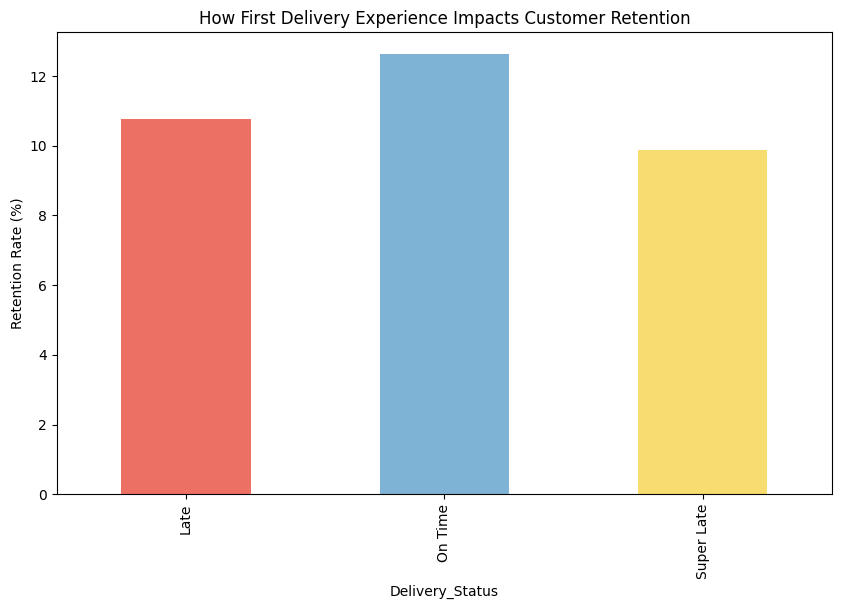

In [45]:
#  Identify First Orders and Repeat Orders
delivered_orders = delivered_orders.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])
delivered_orders['order_number'] = delivered_orders.groupby('customer_unique_id').cumcount() + 1

# Check which unique_ids have more than 1 order (indicating they are repeat customers)
repeated = delivered_orders[delivered_orders['order_number'] > 1]['customer_unique_id'].unique()

# Filtering to only look at the first order experience
first_order = delivered_orders[delivered_orders['order_number'] == 1].copy()
first_order['returned'] = first_order['customer_unique_id'].isin(repeated)


retention_report = first_order.groupby('Delivery_Status').agg(
    total_new_customers=('customer_unique_id', 'count'),
    returned_customers=('returned', 'sum')
)
retention_report['retention_rate_%'] = (retention_report['returned_customers'] / retention_report['total_new_customers']) * 100

print(retention_report)

# Bar plot showing retention rates by delivery status
retention_report['retention_rate_%'].plot(kind='bar', color=['#ec7063', '#7fb3d5', '#f7dc6f'], figsize=(10,6))
plt.title('How First Delivery Experience Impacts Customer Retention')
plt.ylabel('Retention Rate (%)')